In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

import tensorflow_hub as hub
import tensorflow_datasets as tfds

from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
import keras
from keras.applications.densenet import DenseNet201

from sklearn.metrics import confusion_matrix
#from keras.layers.core import Dense, Activation
from tensorflow.keras.layers import Dense, Flatten
from keras.metrics import categorical_crossentropy
from keras.metrics import binary_crossentropy
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing import image_dataset_from_directory
import tensorflow as tf
from keras.preprocessing import image

In [4]:
train_datagen = image.ImageDataGenerator(
    rescale=1./255,
    shear_range = 0.3,
    zoom_range = 0.3,
    horizontal_flip = True,
)
validation_datagen = image.ImageDataGenerator(
    rescale = 1./255
)

In [5]:
train = train_datagen.flow_from_directory(
    '/kaggle/input/flower-histogram-dataset/train',
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical'
)

validation = validation_datagen.flow_from_directory(
    '/kaggle/input/flower-histogram-dataset/validation',
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical'
)

test = validation_datagen.flow_from_directory(
    '/kaggle/input/flower-histogram-dataset/test',
    target_size = (224, 224),
    batch_size = 32,
    shuffle = False,
    class_mode = 'categorical'
)

Found 3540 images belonging to 5 classes.
Found 80 images belonging to 5 classes.
Found 50 images belonging to 5 classes.


In [6]:
DenseNet201 = tf.keras.applications.DenseNet201(
    include_top=False,
    weights = 'imagenet',
    input_shape=(224,224,3),
    )

74836368/74836368 [==============================] - 0s 0us/step


In [7]:
DenseNet201.trainable = False

In [8]:
model = tf.keras.models.Sequential([
  DenseNet201,
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.8),
  tf.keras.layers.Dense(units=1024, activation='relu'),
  tf.keras.layers.Dense(units=512, activation='relu'),
  tf.keras.layers.Dense(units=5, activation='softmax'),
])

In [9]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 7, 7, 1920)        18321984  
                                                                 
 flatten (Flatten)           (None, 94080)             0         
                                                                 
 dropout (Dropout)           (None, 94080)             0         
                                                                 
 dense (Dense)               (None, 1024)              96338944  
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 5)                 2565      
                                                                 
Total params: 115188293 (439.41 MB)
Trainable params: 96

In [10]:
history = model.fit(
    x = train,
    validation_data = validation,
    epochs = 10
)

Epoch 1/10
111/111 [==============================] - 82s 536ms/step - loss: 3.8399 - accuracy: 0.6302 - val_loss: 0.5624 - val_accuracy: 0.8000
Epoch 2/10
111/111 [==============================] - 44s 399ms/step - loss: 0.6617 - accuracy: 0.7681 - val_loss: 0.5947 - val_accuracy: 0.7625
Epoch 3/10
111/111 [==============================] - 45s 401ms/step - loss: 0.5647 - accuracy: 0.7969 - val_loss: 0.4659 - val_accuracy: 0.8375
Epoch 4/10
111/111 [==============================] - 46s 411ms/step - loss: 0.5143 - accuracy: 0.8147 - val_loss: 0.4314 - val_accuracy: 0.8125
Epoch 5/10
111/111 [==============================] - 45s 403ms/step - loss: 0.4595 - accuracy: 0.8308 - val_loss: 0.4311 - val_accuracy: 0.8625
Epoch 6/10
111/111 [==============================] - 44s 397ms/step - loss: 0.4723 - accuracy: 0.8336 - val_loss: 0.5863 - val_accuracy: 0.7875
Epoch 7/10
111/111 [==============================] - 44s 395ms/step - loss: 0.4432 - accuracy: 0.8353 - val_loss: 0.4304 - val_ac

In [11]:






#Evaluate the loss and accuracy
loss, accuracy = model.evaluate(test)

# Print the accuracy
print("Accuracy: " + str(accuracy))
# Print the loss
print("Loss: " + str(loss))

2/2 [==============================] - 3s 3s/step - loss: 0.9483 - accuracy: 0.8200
Accuracy: 0.8199999928474426
Loss: 0.9482675790786743


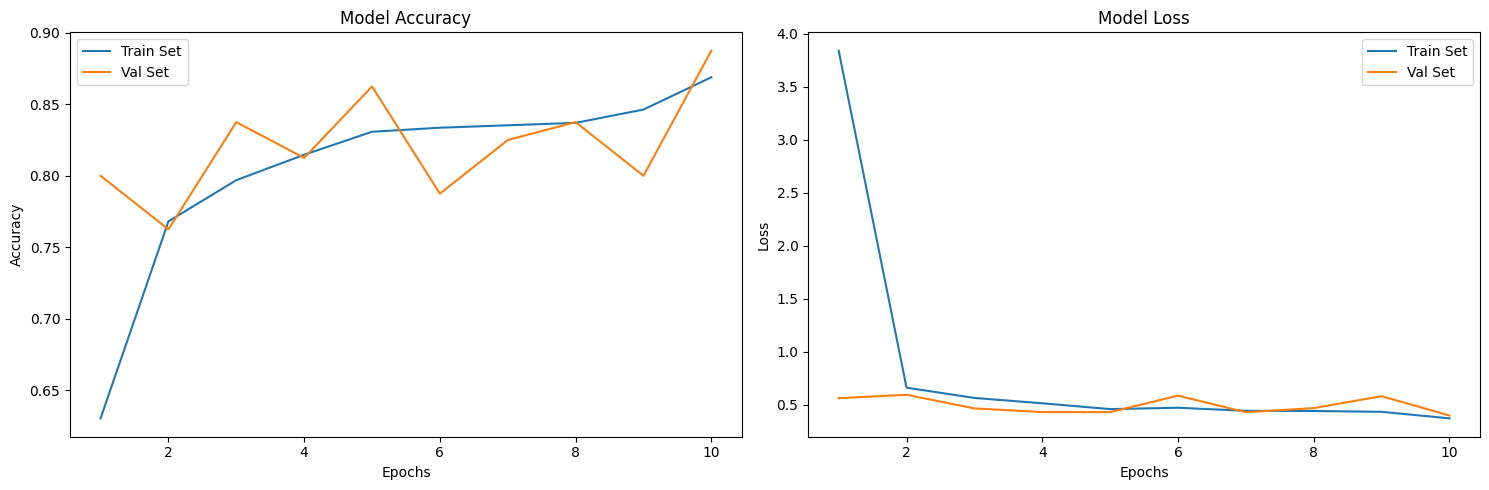

In [12]:
acc =history.history['accuracy']
val_acc =history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()

In [13]:
test.class_indices

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}

In [16]:
import numpy as np
from sklearn import metrics

predictions = model.predict(test)
predicted_classes = np.argmax(predictions, axis = 1)
true_classes = test.classes
class_labels = ['daisy','dandelion','roses','sunflowers','tulips']
report = metrics.classification_report(true_classes, predicted_classes, target_names = class_labels)
print(report)

2/2 [==============================] - 0s 186ms/step
              precision    recall  f1-score   support

       daisy       0.90      0.90      0.90        10
   dandelion       0.90      0.90      0.90        10
       roses       0.67      0.80      0.73        10
  sunflowers       1.00      0.80      0.89        10
      tulips       0.70      0.70      0.70        10

    accuracy                           0.82        50
   macro avg       0.83      0.82      0.82        50
weighted avg       0.83      0.82      0.82        50



<Axes: >

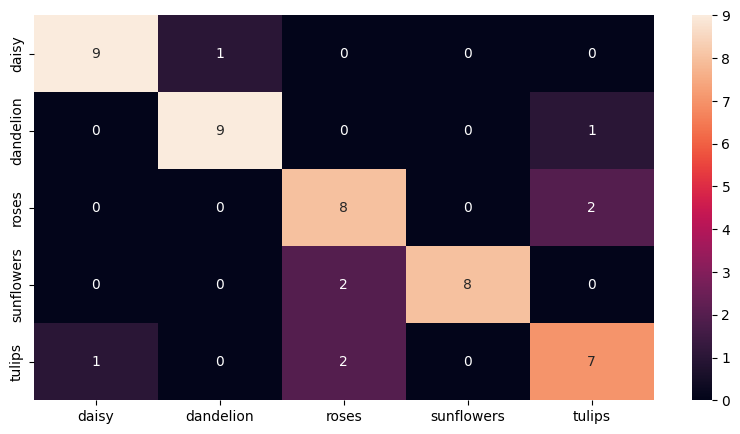

In [17]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

cm = metrics.confusion_matrix(true_classes, predicted_classes)
df_cm = pd.DataFrame(cm, index = [i for i in [ 'daisy','dandelion','roses','sunflowers','tulips']],
                  columns = [i for i in ['daisy','dandelion','roses','sunflowers','tulips']])
plt.figure(figsize = (10,5))
sn.heatmap(df_cm, annot=True, fmt='d')